In [12]:
import numpy as np
import plotly.express as px

df_tips = px.data.tips() # categorical data
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
size_n = np.unique(df_tips['size'])
print(size_n)

[1 2 3 4 5 6]


In [14]:
from sklearn.model_selection import train_test_split

X = df_tips.drop('total_bill', axis=1)
y = df_tips['total_bill']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)

In [15]:
from catboost import CatBoostRegressor, Pool

cat_features = [1, 2, 3, 4] # sex, smoker, day, time
train_dataset = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features
)
eval_dataset = Pool(
    data=X_test,
    label=y_test,
    cat_features=cat_features
)

model = CatBoostRegressor(
    l2_leaf_reg = 0.01,
    iterations = 10,
    depth=3,
    eval_metric='RMSE',
    one_hot_max_size=3 # if less than 3 categories, apply one-hot encoding
)
model.fit(train_dataset, use_best_model=True, eval_set = eval_dataset)

0:	learn: 8.6647662	test: 9.0884054	best: 9.0884054 (0)	total: 1.07ms	remaining: 9.6ms
1:	learn: 8.5539401	test: 8.9938637	best: 8.9938637 (1)	total: 1.47ms	remaining: 5.87ms
2:	learn: 8.4200742	test: 8.8475760	best: 8.8475760 (2)	total: 2.31ms	remaining: 5.4ms
3:	learn: 8.3332551	test: 8.7623686	best: 8.7623686 (3)	total: 2.54ms	remaining: 3.81ms
4:	learn: 8.2293126	test: 8.6804390	best: 8.6804390 (4)	total: 2.8ms	remaining: 2.8ms
5:	learn: 8.1133363	test: 8.5654370	best: 8.5654370 (5)	total: 3.81ms	remaining: 2.54ms
6:	learn: 8.0278360	test: 8.4957680	best: 8.4957680 (6)	total: 4.64ms	remaining: 1.99ms
7:	learn: 7.9347924	test: 8.4034721	best: 8.4034721 (7)	total: 5.5ms	remaining: 1.38ms
8:	learn: 7.8431808	test: 8.3006628	best: 8.3006628 (8)	total: 5.85ms	remaining: 649us
9:	learn: 7.7611528	test: 8.2219878	best: 8.2219878 (9)	total: 6.69ms	remaining: 0us

bestTest = 8.221987823
bestIteration = 9



In [16]:
print(f'best_iteration: {model.get_best_iteration()}, best_score: {model.get_best_score()}')

best_iteration: 9, best_score: {'learn': {'RMSE': 7.761152757557254}, 'validation': {'RMSE': 8.22198782325997}}


In [17]:
model.feature_importances_

array([47.37119581,  0.88319658,  4.1361321 ,  0.        ,  0.        ,
       47.60947551])

0:	learn: 8.6525777	test: 9.0382690	best: 9.0382690 (0)	total: 240us	remaining: 2.17ms
1:	learn: 8.5196705	test: 8.8869550	best: 8.8869550 (1)	total: 504us	remaining: 2.02ms
2:	learn: 8.4089188	test: 8.7898770	best: 8.7898770 (2)	total: 809us	remaining: 1.89ms
3:	learn: 8.2927753	test: 8.6916347	best: 8.6916347 (3)	total: 950us	remaining: 1.43ms
4:	learn: 8.2028161	test: 8.5998895	best: 8.5998895 (4)	total: 1.1ms	remaining: 1.1ms
5:	learn: 8.1033265	test: 8.5021647	best: 8.5021647 (5)	total: 1.32ms	remaining: 878us
6:	learn: 8.0040874	test: 8.4226692	best: 8.4226692 (6)	total: 1.46ms	remaining: 625us
7:	learn: 7.9132607	test: 8.3519107	best: 8.3519107 (7)	total: 1.57ms	remaining: 393us
8:	learn: 7.8253016	test: 8.2638534	best: 8.2638534 (8)	total: 1.72ms	remaining: 190us
9:	learn: 7.7616153	test: 8.2043149	best: 8.2043149 (9)	total: 1.84ms	remaining: 0us

bestTest = 8.204314877
bestIteration = 9



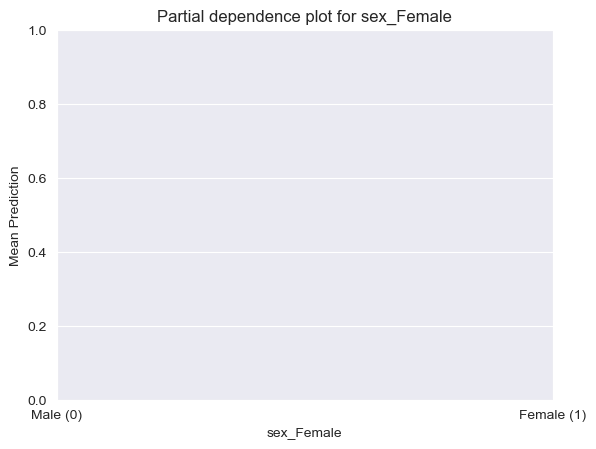

In [30]:
import pandas as pd

# Convert categorical columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=1
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Plot partial dependence for a specific feature
feature_idx = X_encoded.columns.get_loc('sex_Female')  # Example for 'sex_Female' column
model.plot_partial_dependence(
    features=feature_idx,
    data=Pool(data=X_train, label=y_train),
    plot=True
)